# Toy Example2

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

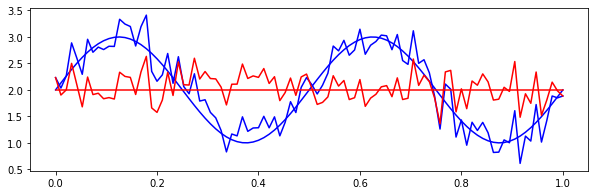

In [3]:
t = np.linspace(0,1,96)
noise = np.random.normal(0, 0.3, len(t))
x1 = np.sin(4*np.pi*t) + 2
x2 = x1 + noise
x3 = 0*np.cos(4*np.pi*t) + 2
x4 = x3 + noise
plt.figure(figsize=(10,3))
plt.plot(t,x1, color='blue')
plt.plot(t,x2, color='blue')
plt.plot(t,x3, color='red')
plt.plot(t,x4, color='red')
plt.show()

In [17]:
X = pd.DataFrame(np.ones((96,4)))
X.iloc[:,0]=x1
X.iloc[:,1]=x2
X.iloc[:,2]=x3
X.iloc[:,3]=x4

In [18]:
X = X.rename(columns={0:'node1', 1:'node2', 2:'node3', 3:'node4'})

In [19]:
X.head()

,node1,node2,node3,node4
0,2.000000,2.232526,2.0,2.232526
1,2.131892,2.035294,2.0,1.903402
2,2.261480,2.262178,2.0,2.000698
3,2.386499,2.887747,2.0,2.501248
4,2.504766,2.596268,2.0,2.091502


In [20]:
cor1 = X.corr()

In [27]:
cor1 = cor1.fillna(0)
cor1 = round(cor1,4)
cor1

,node1,node2,node3,node4
node1,1.0000,0.9318,0.0,-0.0938
node2,0.9318,1.0000,0.0,0.2739
node3,0.0000,0.0000,0.0,0.0000
node4,-0.0938,0.2739,0.0,1.0000


In [31]:
cor2 = pd.DataFrame({'node1':[1.0000,0.0000,0.9318,-0.0938], 'node2':[0.0000, 1.0000, -0.0087, 0.9318], 'node3':[0.9318,-0.0087, 1.0000, 0.0000], 'node4':[-0.0938,0.9318,0.0000,1.0000]})
cor2

,node1,node2,node3,node4
0,1.0000,0.0000,0.9318,-0.0938
1,0.0000,1.0000,-0.0087,0.9318
2,0.9318,-0.0087,1.0000,0.0000
3,-0.0938,0.9318,0.0000,1.0000


<Axes: >

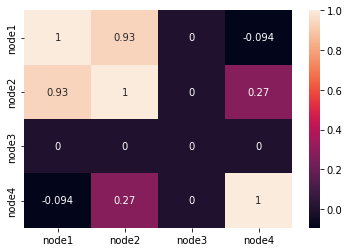

In [32]:
sns.heatmap(cor1, annot=True)

<Axes: >

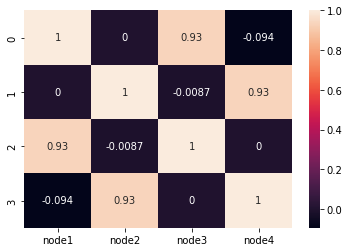

In [33]:
sns.heatmap(cor2, annot=True)

In [34]:
edges = []

for i in range(4):
    for j in range(4):
        #if i != j:
            edges.append([i,j])
print(edges)

[[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 3], [3, 0], [3, 1], [3, 2], [3, 3]]


- Winmilldataset 뜯어보니 일단 다 연결은 해놓은 듯 하다(length: 노드x노드)
- Windmill에서는 자기자신과 연결해놨음. -> 자기자신과의 가중치 1로줬음
- 혹시모르니까 두 개 다 만들어보자..

# Create Dataset

## `-` SELF-LOOP (X)

> 자기자신과 연결X (즉, 가중을 0으로 줌)

In [35]:
FX = []    
for i in range(96):
    FX.append(list(X.iloc[i,:])) 
#FX

In [40]:
weights = []

for i in range(4):
    for j in range(4):
        if i != j:
            weights.append(cor1.iloc[i,j])
        else:
            weights.append(0.0)

In [41]:
weights2 = []

for i in range(4):
    for j in range(4):
        if i != j:
            weights2.append(cor2.iloc[i,j])
        else:
            weights2.append(0.0)

In [42]:
len(edges), len(weights)

(16, 16)

In [45]:
node_list = (X.columns).tolist()
node_ids = {node : i for i, node in enumerate(node_list)}
node_ids

{'node1': 0, 'node2': 1, 'node3': 2, 'node4': 3}

In [46]:
data_dict = {'edges':edges, 'node_ids':node_ids, 'weights':weights, 'FX': FX}

In [47]:
data_dict2 = data_dict.copy()

In [48]:
data_dict2['weights'] = weights2

In [49]:
import json
import urllib

In [50]:
# file_path = './toy_example2/data/normal.json'
# with open(file_path, 'w') as f:
#     json.dump(data_dict, f)

In [51]:
# with open('./toy_example2/data/abnormal.json', 'w') as f:
#     json.dump(data_dict2, f)

## `-` SELF-LOOP

> 자기자신과 연결 (가중치를 1로)

In [74]:
weights_ = []

for i in range(4):
    for j in range(4):
        if i!=j:
            weights_.append(cor1.iloc[i,j])
        else:
            weights_.append(1)

In [76]:
np.array(weights_).reshape(4,4)

array([[ 1.    ,  0.9318,  0.    , -0.0938],
       [ 0.9318,  1.    ,  0.    ,  0.2739],
       [ 0.    ,  0.    ,  1.    ,  0.    ],
       [-0.0938,  0.2739,  0.    ,  1.    ]])

In [77]:
weights_2 = []

for i in range(4):
    for j in range(4):
        if i!=j:
            weights_2.append(cor2.iloc[i,j])
        else:
            weights_2.append(1)

In [80]:
np.array(weights_2).reshape(4,4)

array([[ 1.    ,  0.    ,  0.9318, -0.0938],
       [ 0.    ,  1.    , -0.0087,  0.9318],
       [ 0.9318, -0.0087,  1.    ,  0.    ],
       [-0.0938,  0.9318,  0.    ,  1.    ]])

In [81]:
data_dict_ = {'edges':edges, 'node_ids':node_ids, 'weights':weights_, 'FX': FX}

In [82]:
data_dict2_ = data_dict_.copy()
data_dict2_['weights'] = weights_2

In [83]:
len(data_dict_['weights']), len(data_dict2_['weights'])

(16, 16)

In [84]:
# with open('./toy_example2/data/self_loop/normal.json', 'w') as f:
#     json.dump(data_dict_, f)

In [85]:
# with open('./toy_example2/data/self_loop/abnormal.json', 'w') as f:
#     json.dump(data_dict2_, f)

# LRNR

In [52]:
import eptstgcn
import torch
import pandas as pd
import numpy as np
import gc

In [2]:
import importlib
importlib.reload(eptstgcn)

<module 'eptstgcn' from '/home/jy/Dropbox/noteda/posts/SOLAR/eptstgcn/__init__.py'>

In [53]:
url1 = 'https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/toy_example2/data/normal.json'
loader1 = eptstgcn.DatasetLoader(url1)
dataset1 = loader1.get_dataset(lags=4)
train_dataset, test_dataset = eptstgcn.utils.temporal_signal_split(dataset1, train_ratio = 0.7)

In [54]:
url2 = 'https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/toy_example2/data/abnormal.json'
loader2 = eptstgcn.DatasetLoader(url2)
dataset2 = loader2.get_dataset(lags=4)
train_dataset2, test_dataset2 = eptstgcn.utils.temporal_signal_split(dataset2, train_ratio = 0.7)

In [55]:
lrnr = eptstgcn.StgcnLearner(train_dataset, dataset_name = 'ver1')
lrnr2 = eptstgcn.StgcnLearner(train_dataset2, dataset_name = 'ver2')

/home/jy/Dropbox/noteda/posts/SOLAR/eptstgcn/learners.py:50: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402421473/work/torch/csrc/utils/tensor_new.cpp:245.)
  self.lags = torch.tensor(train_dataset.features).shape[-1]


In [56]:
lrnr.learn(filters=32, epoch=50)

In [57]:
lrnr2.learn(filters=32, epoch=50)

# VISUALIZATION

|구분|mse(train)|mse(test)|
|:---|:---------|:--------|
|가중치 잘 준 버전|0.07|0.07|
|가중치 이상하게|0.18|0.29|
||||
|가중치 잘 준 버전(+self-loop)|0.07|0.07|
|가중치 이상하게(+self-loop)|0.35|0.62|


### VER1.노드1,2 // 노드3,4

In [58]:
evtor1 = eptstgcn.ToyEvaluator(lrnr, train_dataset, test_dataset)
evtor2 = eptstgcn.ToyEvaluator(lrnr2, train_dataset2, test_dataset2)

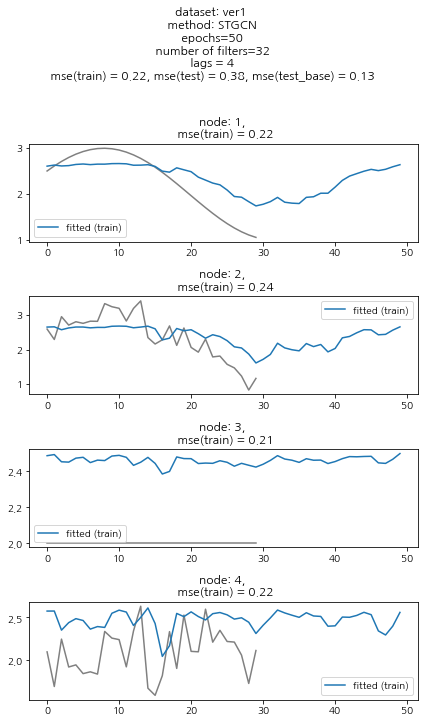

In [65]:
evtor1.tr_plot(t=50)

In [60]:
np.array(test_dataset.features).shape

(28, 4, 4)

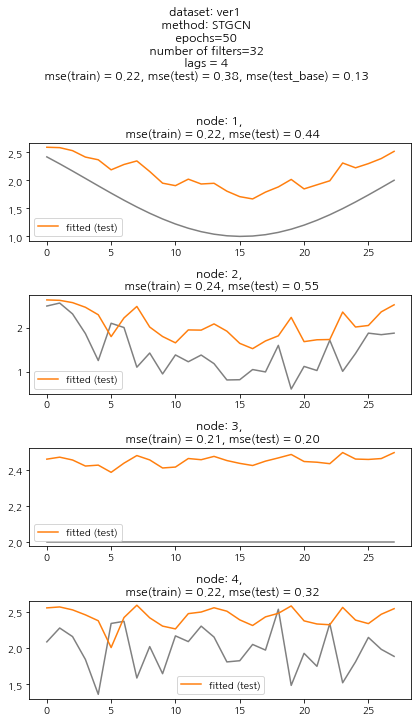

In [61]:
evtor1.test_plot(t=28)

### VER2. 노드1,3 // 노드2,4

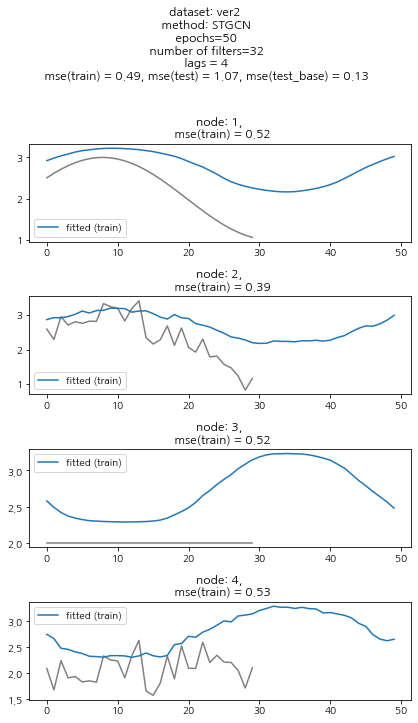

In [69]:
evtor2.tr_plot(t=50)

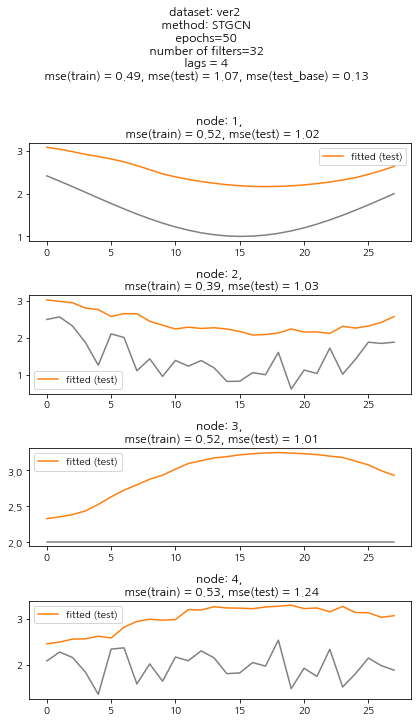

In [64]:
evtor2.test_plot(t=28)